In [2]:
import pymrio
# show version of pymrio
print(pymrio.__version__)
test_mrio = pymrio.load_test()

0.6.0.dev0


In [3]:
exio3_folder = "H:\MyDocuments\Data\EXIOBASE3"


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\min\AppData\Local\Temp\ipykernel_29028\3458216953.py:1: SyntaxWarning: invalid escape sequence '\M'
  exio3_folder = "H:\MyDocuments\Data\EXIOBASE3"


In [4]:
exio_downloadlog = pymrio.download_exiobase3(
    storage_folder=exio3_folder, 
    system="pxp", 
    years=[2022]
)

In [8]:
from pathlib import Path
p_2022 = Path(exio3_folder) / "IOT_2022_pxp.zip"
p_2020 = Path(exio3_folder) / "IOT_2020_pxp.zip"
print(p_2022.exists())

True


In [6]:
exio3 = pymrio.parse_exiobase3(path=p_2022)

In [9]:
exio3.meta
exio3.get_regions()

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

In [10]:
str(exio3)

'IO System with parameters: Z, Y, x, A, unit, meta, air_emissions, employment, water, factor_inputs, nutrients, material'

In [13]:
# Get the class information of A
print(type(exio3.A))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
exio3.calc_system() # Only for this IO system (and no sub-satellite systems)
str(exio3) 

'IO System with parameters: Z, Y, x, A, As, L, G, unit, meta, air_emissions, employment, water, factor_inputs, nutrients, material'

In [ ]:
str(exio3.employment)
# exio3.employment.M  # M = SL

'Extension air emissions with parameters: name, F, F_Y, unit'

In [17]:
exio3.employment.calc_system(exio3.x, exio3.Y)
str(exio3.employment)

'Extension employment with parameters: name, F, F_Y, S, S_Y, unit'

In [ ]:
sec = exio3.get_sectors()

agri_ind = list(range(0, 14)) + [18] 
proc_ind = list(range(42, 53))
svc_ind = [155]

agri_sectors = sec[agri_ind]
proc_sectors = sec[proc_ind]
svc_sectors = sec[svc_ind]

# Combine all food sectors
food_sectors = sec[agri_ind + proc_ind + svc_ind]

print(agri_sectors)
print(proc_sectors)
print(svc_sectors)

Index(['Paddy rice', 'Wheat', 'Cereal grains nec', 'Vegetables, fruit, nuts',
       'Oil seeds', 'Sugar cane, sugar beet', 'Plant-based fibers',
       'Crops nec', 'Cattle', 'Pigs', 'Poultry', 'Meat animals nec',
       'Animal products nec', 'Raw milk',
       'Fish and other fishing products; services incidental of fishing (05)'],
      dtype='object', name='sector')
Index(['Products of meat cattle', 'Products of meat pigs',
       'Products of meat poultry', 'Meat products nec',
       'products of Vegetable oils and fats', 'Dairy products',
       'Processed rice', 'Sugar', 'Food products nec', 'Beverages',
       'Fish products'],
      dtype='object', name='sector')
Index(['Hotel and restaurant services (55)'], dtype='object', name='sector')


In [ ]:
# Add employment stressors for the 6 employment categories
exio3.emp = []
# add a for loop from 0 to 5
emp_ind = exio3.employment.get_index()

# Calculate the employment stressors for each category
for i in range(1):
    exio3.emp.append(exio3.employment.diag_stressor(emp_ind[i], name=f"emp_{i}"))   
    print(f"Created employment stressor for category {i}: {emp_ind[i]}")
    exio3.emp[i].calc_system(exio3.x, exio3.Y, L=exio3.L) # Without L and F_Y, this generates only the S matrix.
    # With L and F_Y, this generates all of M, D_cba, D_pba, D_imp, D_exp, unit, D_cba_reg, D_pba_reg, D_imp_reg, D_exp_reg
    print(exio3.emp[i].name)
    print(str(exio3.emp[i]))
    # exio3.emp[i].M = pymrio.calc_M(exio3.emp[i].S, exio3.L)
    # print(str(exio3.emp[i]))


Created employment stressor for category 0: Employment hours: High-skilled female
emp_0
Extension emp_0 with parameters: name, F, S, M, D_cba, D_pba, D_imp, D_exp, unit, D_cba_reg, D_pba_reg, D_imp_reg, D_exp_reg


In [ ]:
print(exio3.emp[0].D_cba) # Impact of individual sectors and country/region
print(exio3.emp[0].D_cba_reg) # Sum by country/region

In [ ]:
# for i in range(1):
#     exio3.emp[0].M = pymrio.calc_M(exio3.emp[0].S, exio3.L)


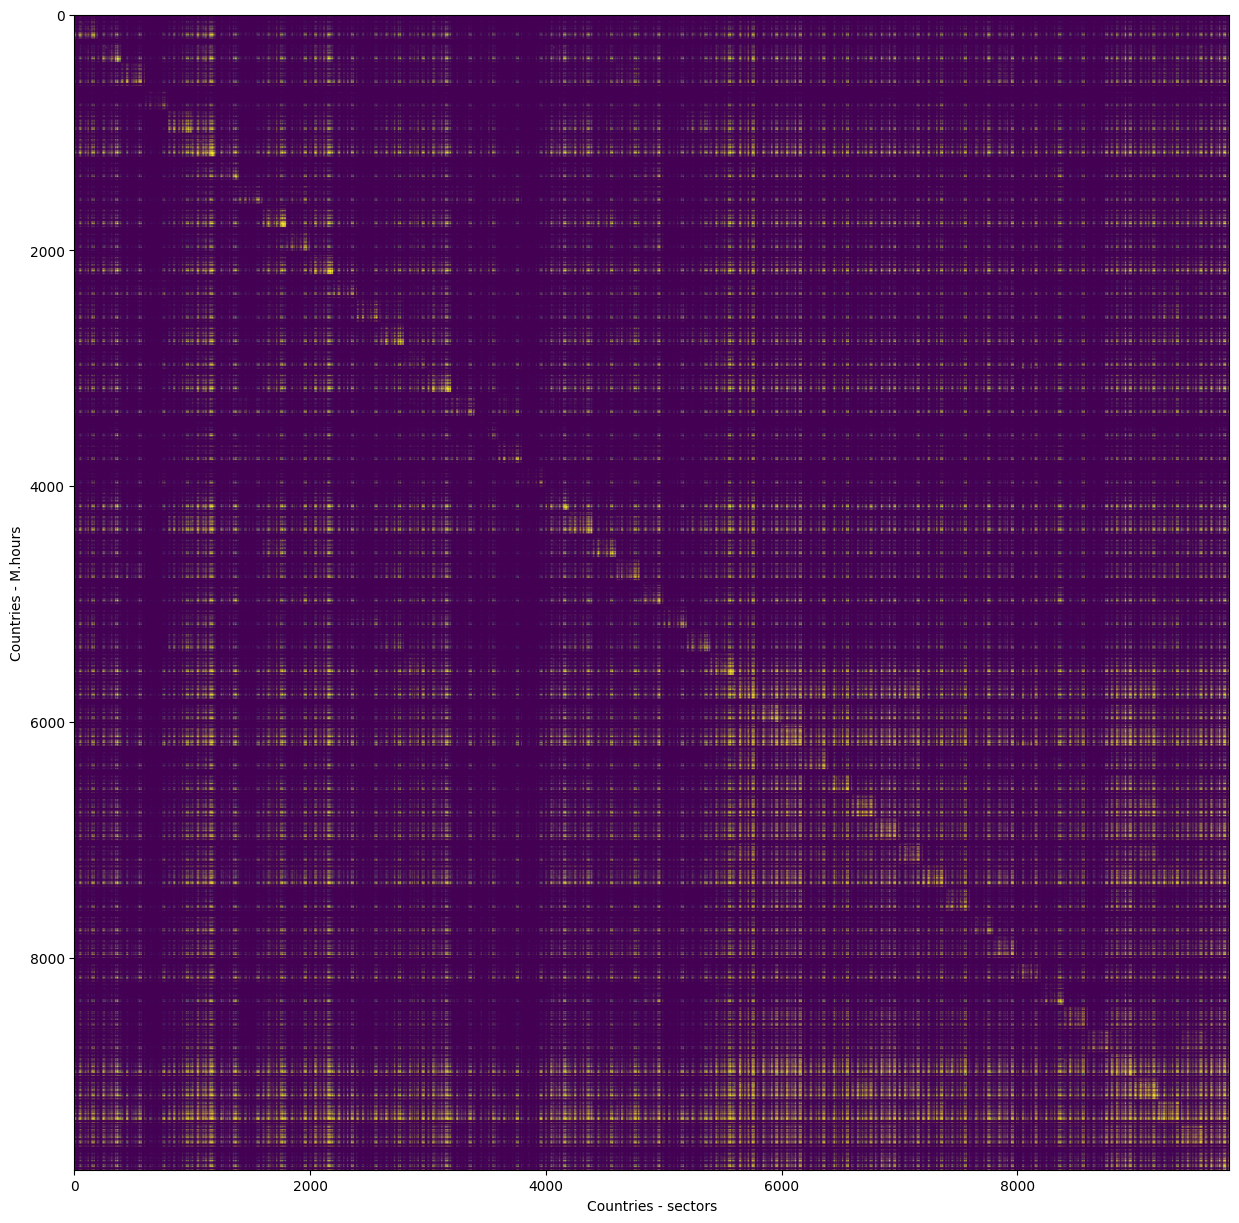

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(m, vmax=1e-3)
plt.xlabel("Countries - sectors")
plt.ylabel("Countries - M.hours")
plt.show()

In [ ]:
Y_food = exio3.Y.copy()

# print(Y_food.index)
# set all row values to zero for 'sector' name match foodsectors
Y_food.loc[~Y_food.index.get_level_values('sector').isin(foodsectors), :] = 0
print(Y_food.head())

In [ ]:
# # Compare difference between exio3.Y and Y_all
# print("Original Y:")
# print(exio3.Y.tail())   
# print("Modified Y_all:")
# print(Y_food.tail())

In [ ]:
# Y_org = exio3.Y.copy()
# D_cba_org = exio3.employment.D_cba
# print(Y_food.shape)
# print(Y_org.shape)

(9800, 343)
(9800, 343)


In [ ]:
# exio3.reset_all_to_coefficients()


In [ ]:
# exio3.Y = Y_org
# exio3.employment.F

In [1]:
# Recalculate all matrices based on the modified Y
# exio3.calc_all()
exio3.emp_HF_diag


NameError: name 'exio3' is not defined

In [ ]:
m = exio3.emp_diag.D_cba.copy()
print(m.index)


MultiIndex([('AT',                                          'Paddy rice'),
            ('AT',                                               'Wheat'),
            ('AT',                                   'Cereal grains nec'),
            ('AT',                             'Vegetables, fruit, nuts'),
            ('AT',                                           'Oil seeds'),
            ('AT',                              'Sugar cane, sugar beet'),
            ('AT',                                  'Plant-based fibers'),
            ('AT',                                           'Crops nec'),
            ('AT',                                              'Cattle'),
            ('AT',                                                'Pigs'),
            ...
            ('WM',                       'Paper for treatment: landfill'),
            ('WM',               'Plastic waste for treatment: landfill'),
            ('WM', 'Inert/metal/hazardous waste for treatment: landfill'),
         

In [ ]:
# Compare the modified D_cba with the original
print("Original D_cba:")
print(D_cba_org.tail())
print("Modified D_cba:")
print(exio3.employment.D_cba.tail())


In [ ]:
print(Y_all.head())